# Part II - Explanatory Analysis of the Ford GoBike System Data
## by Sky Adams

## Investigation Overview

In this investigation I wanted to look at who was using (and not using) the bike share program and how they were using it. These insights could be combined with data about the population to help identify how to expand the use of the bike share program. I focused on gender, birth year, and participation in the Bike Share for All program, a program that makes bike sharing more affordable for low income residents. I also looked at how the different demographic groups were using the bike share program in terms of ride duration.


## Dataset Overview and Executive Summary

The data used in this exploration comes from a bike share system in the greater San Francisco Bay area. It includes information about 183,412 rides, including when and where the ride started and stopped, what bike was used, and the birth year, gender, and type of user of the rider, and whether or not the rider was part of the bike share for all program. Rides containing impossible birth years were removed from the dataset.  

1. There are fewer than 4,000 rides completed by a rider with a gender labeled as "other."
2. There are more than 3 times as many rides completed by males than by females.
3. Most riders were born between 1980 and 2000, with the peak being around 1990.
5. About 10% of rides were completed by riders in the Bike Share for All program.
7. Rides completed by females were slightly longer, on average, than rides completed by males, but there was much more variance in their length. 
9. Rides completed by people who are in the Bike Share for All program tend to be slightly shorter (by about 100 seconds or about 1.5 minutes on average) and have slightly less variance in length than the rides completed by people who aren't in the program.
10. The bivariate relationships between gender and ride duration and between Bike Share for All participation and ride duration build on each other. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata_clean.csv')
df['member_gender'] = df['member_gender'].astype('category')

## Distribution of Genders

There were over 175,000 rides in the data set. About 75% of them were completed by males, about 23% by females, and about 2% by riders of another gender.

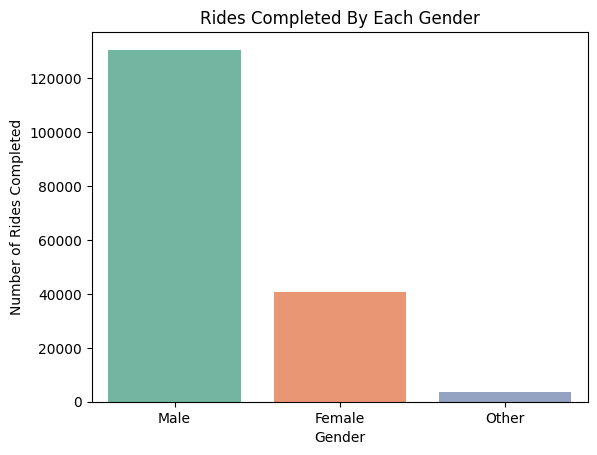

In [3]:
order_desc = df['member_gender'].value_counts().index
sns.countplot(data=df,x='member_gender',order=order_desc, palette='Set2')
plt.title('Rides Completed By Each Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Rides Completed');

## Distribution of Birth Years

Most riders were born between 1980 and 2000, with the peak being around 1990. The distribution of birth years appears to be approximately the same for males and females. There is not enough data from riders with a gender labeled as "Other" to be able to make a meaningful statement about thier birth year distribution, so they are not included in the histogram below.

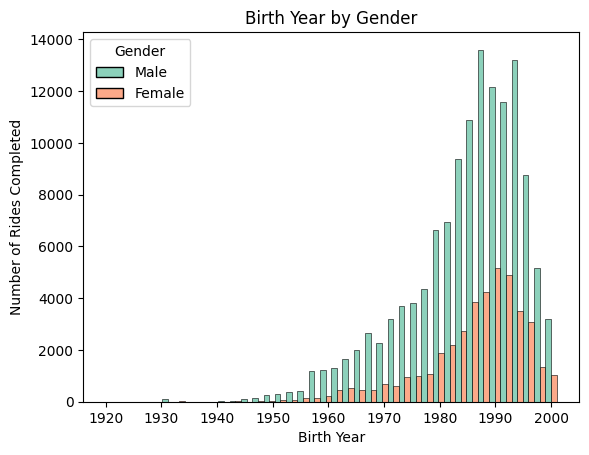

In [9]:
male_and_female_df = df[df['member_gender'] != 'Other']
new_categories = ['Male', 'Female']
new_dtype = pd.CategoricalDtype(categories=new_categories)
male_and_female_df['member_gender'] = male_and_female_df['member_gender'].astype(new_dtype)
ax = sns.histplot(data=male_and_female_df, x='member_birth_year', hue='member_gender', multiple='dodge', palette='Set2',bins=40)
legend = ax.get_legend()
handles = legend.legend_handles
ax.legend(handles, new_categories, title='Gender')
plt.title('Birth Year by Gender')
plt.xlabel('Birth Year')
plt.ylabel('Number of Rides Completed');

## Bike Share for All Rides

About 10% of the rides were completed by participants in the Bike Share for All program, a program that makes bike sharing more affordable for low-income residents. If we had data on the percentage of the population that is elligible for the program, we could determine whether low income residents are using the bike share program more or less than those that aren't low income.

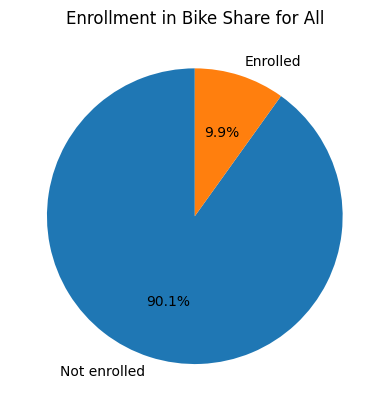

In [5]:
counts = df['bike_share_for_all_trip'].value_counts()
labels = ['Not enrolled', 'Enrolled']
plt.pie(counts, autopct='%.1f%%', startangle=90, labels=labels);
plt.title('Enrollment in Bike Share for All');

## Trip Duration

The average trip duration is dependent upon both gender and enrollment in the Bike Share for All program. Being female was correlated with longer trip durations, as was not being enrolled in the Bike Share for All program. Male Bike Share for All participants had the lowest average trip duration and female riders who weren't in the Bike Share for All program had the highest average trip duration. The distribution of ride durations of female program participants and male non-participants is almost identical.

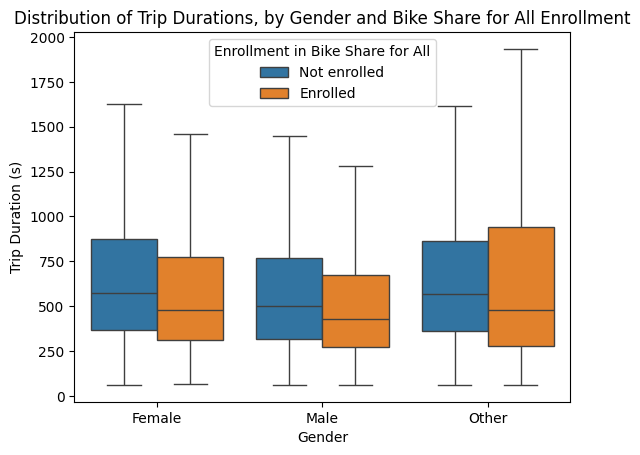

In [6]:
ax = sns.boxplot(data=df,x='member_gender',y='duration_sec',hue='bike_share_for_all_trip', showfliers=False);
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Not enrolled', 'Enrolled']
ax.legend(handles, new_labels, loc='upper center', title="Enrollment in Bike Share for All") 
plt.xlabel('Gender')
plt.ylabel('Trip Duration (s)')
plt.title('Distribution of Trip Durations, by Gender and Bike Share for All Enrollment');

## Percent of Rides Completed by Each Gender Broken Down by Bike Share for All Enrollment Status

The percentage of rides completed by female and male riders is almost the same regardless of whether or not the rider was part of the Bike Share for all program. Among those with gender labeled as "Other" there is a slight difference in the percentage of rides between those enrolled in the program and those who aren't, but there are few data points for that gender category, so differences should be interpretted carefully.

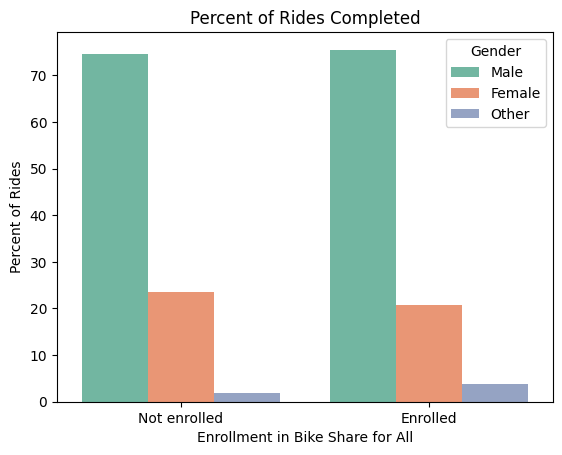

In [7]:
percentages = df.groupby('bike_share_for_all_trip')['member_gender'].value_counts(normalize=True)*100
#percentages = percentages.sort_values()
order=['Male', 'Female', 'Other']
percentages = percentages.reset_index()
ax = sns.barplot(data=percentages, x='bike_share_for_all_trip', hue='member_gender', y='proportion', hue_order=order, palette='Set2');
ax.legend(title='Gender')
custom_labels = ['Not enrolled', 'Enrolled']
ax.set_xticklabels(custom_labels)
plt.title('Percent of Rides Completed')
plt.xlabel('Enrollment in Bike Share for All')
plt.ylabel('Percent of Rides');